# Importing Libraries

In [784]:
import os
import shutil 
import random
from sklearn.neighbors import KNeighborsClassifier
from skimage import io,transform,feature,color,exposure
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from skimage.filters import scharr

# Creation of Training Dataset (no need to run everytime)

In [171]:
#Providing with the folder paths
Data_folder='synthetic' # Source dataset where the digit image files are stored in their respective folder
output_folder='Train_dataset'# Destination folder which should contain all the image files readily available to train the algorithm
output_folder_path=os.path.join(Data_folder,output_folder) #providing the path of the destination file which was intended to be in the same folder

In [986]:
# Creation of the training dataset folder if it doesn't exist
if not os.path.exists(output_folder_path):
    os.makedirs(output_folder_path)
images_paths = []
labels_list = []
# Copying images from individual folders to train dataset folder
for digit_folder in os.listdir(Data_folder):# unwrapping the main folder and iterating over each subfolder(digit folder)
    digit_folder_path = os.path.join(Data_folder, digit_folder)#obtaining the path of each digit folder with the help of main folder
    if os.path.isdir(digit_folder_path):#Checking for the presence of unneccessary directories
        if digit_folder.isdigit(): 
            for image_file in os.listdir(digit_folder_path): # iterating over each image in each digit folder
                image_path = os.path.join(digit_folder_path, image_file)#Obtaining the image file path
                output_image_path = os.path.join(output_folder_path, image_file)#Obtaining the path for image in the destination folder
                # Checking for pre-existing/duplicacy of the same image file
                if not os.path.exists(output_image_path):
                    shutil.copy(image_path, output_image_path) #Creation of the dataset folder
                # Storing file path and corresponding labels
                images_paths.append(output_image_path)
                labels_list.append(int(digit_folder))
#for image_path, label in zip(images_paths, labels_list):
    #print(f"Sample '{os.path.basename(image_path)}' copied to '{output_folder_path}' with label '{label}'")


In [987]:
labels_list

In [988]:
images_paths

In [262]:
len (os.listdir('testdata/'))

11

# Feature extraction function

In [953]:
def loading_and_feature_engineering(trainingdataset,image_extension='.jpg'):
    images = []
    Label_list = []
    # Creating an empty list for images and labels to append further.
    for root,dirs,files in os.walk(trainingdataset):
        for imgfile in files:
            # Checking if the file has the specified image extension
            if imgfile.lower().endswith(image_extension.lower()):
                every_image_path = os.path.join(root, imgfile)
                num_image = io.imread(every_image_path)
                hog_features = feature.hog(num_image, orientations=9, pixels_per_cell=(4,4), cells_per_block=(2,2), block_norm='L2-Hys')
                images.append(hog_features)
                Labels = int(imgfile.split('_')[1])
                Label_list.append(Labels)
    return images, Label_list

__Feature extraction for training data__

In [954]:
#Image samples folder
folder_details='synthetic/Train_dataset/'

In [955]:
# Assigning hog features and labels
Hog_features,respective_labels=loading_and_feature_engineering(folder_details)# function call 

In [956]:
#Checking the length of hog features
len(Hog_features)

6000

- 6000 hog features as there are 6000 sample images

In [957]:
#Checking the shape of each hog feature
Hog_features[1].shape

(324,)

In [958]:
#Checking the length of labels
len(respective_labels)

6000

In [959]:
u=np.unique(respective_labels)
u

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [960]:
# converting the lists into arrays
hog_data=np.array(Hog_features)
Final_labels=np.array(respective_labels)

In [961]:
hog_data

array([[0.1940781 , 0.        , 0.        , ..., 0.        , 0.        ,
        0.19850558],
       [0.0625129 , 0.        , 0.        , ..., 0.02483065, 0.        ,
        0.        ],
       [0.19246778, 0.06127575, 0.03758159, ..., 0.        , 0.06048451,
        0.        ],
       ...,
       [0.18735622, 0.27706968, 0.04491582, ..., 0.        , 0.        ,
        0.02704405],
       [0.03812497, 0.01092194, 0.01117115, ..., 0.03954877, 0.        ,
        0.08172419],
       [0.30643326, 0.25485597, 0.        , ..., 0.        , 0.        ,
        0.34229484]])

In [962]:
Final_labels

array([4, 3, 7, ..., 7, 6, 2])

In [963]:
# Scaling the hog features before processing
scaler=StandardScaler() #Initialising the object for scaling 
scaled_hog=scaler.fit_transform(hog_data) #performing scaling

__Feature extraction for test data__

In [964]:
test_folder='testdata/'

In [965]:
test_hog_features,test_labels=loading_and_feature_engineering(test_folder)

In [989]:
test_hog_features

In [990]:
test_labels

In [968]:
Test_hog_features=np.array(test_hog_features)
Test_labels=np.array(test_labels)

In [969]:
len(Test_hog_features)

2500

In [970]:
len(test_labels)

2500

__Performing the training and testing split__

In [971]:
X_train, X_val, y_train, y_val = train_test_split(hog_data,Final_labels, test_size=0.1, random_state=42)

In [972]:
X_train

array([[0.29381876, 0.02679286, 0.01406586, ..., 0.        , 0.        ,
        0.02091407],
       [0.15069611, 0.01247135, 0.01856515, ..., 0.01181414, 0.12370055,
        0.        ],
       [0.18854115, 0.        , 0.00720404, ..., 0.        , 0.        ,
        0.07542121],
       ...,
       [0.04035598, 0.        , 0.        , ..., 0.00850113, 0.2060556 ,
        0.3098296 ],
       [0.26289179, 0.        , 0.01030292, ..., 0.        , 0.06063076,
        0.        ],
       [0.31851145, 0.01299277, 0.        , ..., 0.        , 0.        ,
        0.16611765]])

In [973]:
y_train

array([7, 3, 8, ..., 5, 3, 2])

__Creation of KNN classifier__

In [974]:
#Creating the object for knn classifier
knn_classifier = KNeighborsClassifier(n_neighbors=1)
#Fitting the algorithm with training data i.e both features and labels
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [975]:
# Making predictions on the test dataset
y_pred = knn_classifier.predict(Test_hog_features)

In [976]:
# Evaluation Metrics
C_Mat = confusion_matrix(Test_labels, y_pred)
Accuracy_score=accuracy_score(Test_labels,y_pred)
print(f'Accuracy Score for the cellsize of (4,4) is {Accuracy_score}')

Accuracy Score for the cellsize of (4,4) is 0.8736


In [977]:
C_DF=pd.DataFrame(C_Mat,index=range(10),columns=range(10))

In [978]:
C_DF

,0,1,2,3,4,5,6,7,8,9
0,202,0,0,0,0,0,4,0,0,44
1,0,250,0,0,0,0,0,0,0,0
2,0,0,200,0,50,0,0,0,0,0
3,0,0,0,196,0,41,6,0,7,0
4,0,0,0,0,250,0,0,0,0,0
5,0,0,0,9,0,234,0,0,0,7
6,0,0,0,1,0,0,200,0,0,49
7,0,0,7,0,3,0,0,240,0,0
8,0,0,0,21,8,2,0,0,200,19
9,0,5,0,7,0,0,0,25,1,212


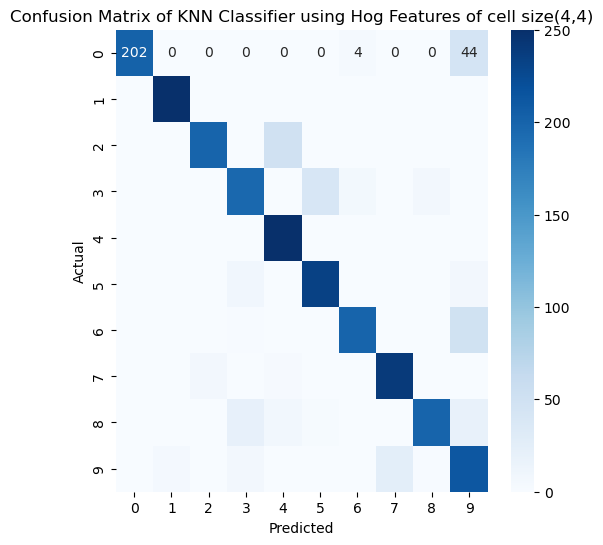

In [979]:
plt.figure(figsize=(6, 6))
sns.heatmap(C_DF, annot=True, fmt='d',cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix of KNN Classifier using Hog Features of cell size(4,4)")
plt.show()

# Feature extraction(Compass gradients)

In [435]:
def loading_and_feature_engineering_compassgradient(trainingdataset, image_extension='.jpg'):
    images = []
    Label_list = []
    #Initialising the empty list
    for root,dirs,cfiles in os.walk(trainingdataset):
        for cimgfile in cfiles:#iterating over the each image file in the train dataset
            # Checking if the file has the specified image extension
            if cimgfile.lower().endswith(image_extension.lower()):
                every_image_path = os.path.join(root, cimgfile)#Retrieving the image file path
                num_image = io.imread(every_image_path)
                compass_gradients = scharr(num_image)#Calculating compass gradient features using scharr operator
                compass_gradients_flat = compass_gradients.flatten()#Flatten the compass gradient features to use as input             
                images.append(compass_gradients_flat)
                Labels = int(cimgfile.split('_')[1])
                Label_list.append(Labels)
                #Appending all the gradient features and respective features
    return images, Label_list

In [436]:
#Retrieving the features of train dataset from the described function
compassfeat,compasslabels=loading_and_feature_engineering_compassgradient(folder_details)

In [948]:
Feature_length_for_CG=len(compassfeat[1])

In [991]:
compasslabels

In [439]:
len(compasslabels)

6000

In [440]:
len(compassfeat)

6000

In [441]:
compassfeatarray=np.array(compassfeat)
labelarray=np.array(compasslabels)

__Test data feature extraction__

In [442]:
#Retrieving the features of test dataset from the described function
testcompassfeat,testcompasslabels=loading_and_feature_engineering_compassgradient(test_folder)

In [992]:
testcompassfeat

In [993]:
testcompasslabels

In [447]:
#Getting the arrays from lists for the dataset split
testcompassarray=np.array(testcompassfeat)
testcompasslabels=np.array(testcompasslabels)

__Training and test data split__

In [445]:
X_train, X_test, y_train, y_test = train_test_split(compassfeatarray,labelarray, test_size=0.1, random_state=42)

- X=Compass Gradient Features
- Y=Respective labels

# Feeding to Model

In [446]:
#Fitting the training sample to the predefined knn classifier 
knn_classifier.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [449]:
#Predicting the labels of test data and assigning them to compasspred variable
Compasspred=knn_classifier.predict(testcompassarray)

In [454]:
# Evaluation Metrics
Compass_CMat = confusion_matrix(testcompasslabels,Compasspred)#Retrieving the confusion matrix
Compass_Accuracy_score=accuracy_score(testcompasslabels,Compasspred)
print(Compass_Accuracy_score)

0.7152


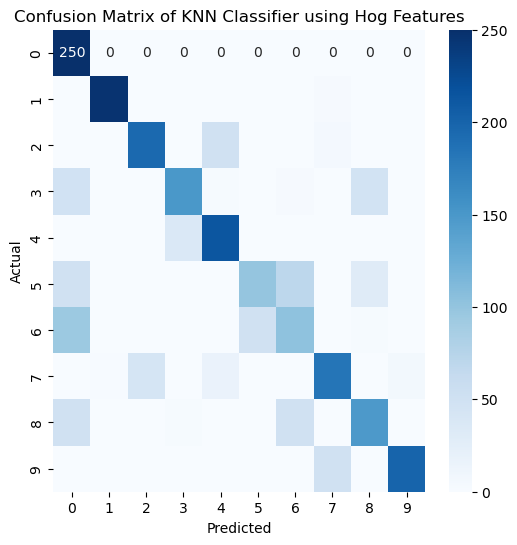

In [981]:
plt.figure(figsize=(6, 6))
sns.heatmap(Compass_CMat, annot=True, fmt='d',cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix of KNN Classifier using Hog Features")
plt.show()

In [457]:
CompassDF=pd.DataFrame(C_Mat,index=range(10),columns=range(10))

In [458]:
CompassDF

,0,1,2,3,4,5,6,7,8,9
0,250,0,0,0,0,0,0,0,0,0
1,0,247,0,0,0,0,0,3,0,0
2,0,0,195,0,50,0,0,5,0,0
3,48,0,0,150,2,0,3,0,47,0
4,0,0,0,37,213,0,0,0,0,0
5,50,0,0,0,0,99,70,0,31,0
6,95,0,0,0,0,50,103,0,2,0
7,0,1,43,0,17,0,0,183,0,6
8,50,0,0,2,0,0,50,0,148,0
9,0,0,0,0,0,0,0,50,0,200


# Outcome Discusiion and Conclusion

In [982]:
print(f'Accuracy Score of the KNN classifier for a HOG cell size of (2,2) is {Accuracy_score_twobytwo}\n'
      f'Accuracy Score of the KNN classifier for a HOG cell size of (4,4) is {Accuracy_score_fourbyfour}\n'
      f'Accuracy Score of the KNN classifier for a HOG cell size of (8,8) is {Accuracy_score_Eightbyeight}')

Accuracy Score of the KNN classifier for a HOG cell size of (2,2) is 0.8184
Accuracy Score of the KNN classifier for a HOG cell size of (4,4) is 0.8736
Accuracy Score of the KNN classifier for a HOG cell size of (8,8) is 0.8184


In [983]:
print(f'Feature length for a HOG cell size of (2,2) is {HOg_Feature_length_for_two}\n'
      f'Feature lengthfor a HOG cell size of (4,4) is {HOg_Feature_length_for_four}\n'
      f'Feature length for a HOG cell size of (8,8) is {HOg_Feature_length_for_eight}')

Feature length for a HOG cell size of (2,2) is (1764,)
Feature lengthfor a HOG cell size of (4,4) is (324,)
Feature length for a HOG cell size of (8,8) is (36,)


In [984]:
print(f'Feature length When compass gradient technique appllied is {Feature_length_for_CG}\n'
     f'Accuracy Score of the KNN classifier using Compass Gradient features is {Compass_Accuracy_score}')

Feature length When compass gradient technique appllied is 256
Accuracy Score of the KNN classifier using Compass Gradient features is 0.7152


__Considering the Above evaluation metrics (i.e Accuracy Scores and Confusion matrices),respective feature lengths and the time taken for the operation.__

__1.We can conclude that HOG technique performed better when compared to the compass gradient technique for the feature extraction in this case for the working datasets.__

__2.Hog relatively performed well with a better accuracy with a limited number of features i.e considering the second and third combinations of hog with a cell size of (4,4) and (8,8) with a feature length of 324 and 36 respectively whereas hog with a feature length of 256 is able to produce just 0.7152 which is comparitively less when compared to both the cases of hog(Here not comparing with the hog (2,2) cell size because of it's feature length and it's prolonged time taking process)__

__3.When it comes to the selection of best HOG combination (8,8) cell size would be considerably better with a less number of features and a bit more accuracy when compared to the rest of the combinations__
